In [1]:
#import all the required libraries :
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Imports the dataset 
dataset = pd.read_csv('gmc_pickup.csv')
dataset.shape

(23, 2)

In [3]:
# It gives (23, 2) as output which means 
# our dataset has 23 rows and 2 columns.

In [4]:
# To see the statistical details of the dataset, we can use describe():
dataset.describe()

,X,Y
count,23.000000,23.000000
mean,17.465217,15.300000
std,2.413901,2.057580
min,12.400000,11.200000
25%,15.800000,14.050000
50%,17.299999,15.100000
75%,19.300000,16.849999
max,22.400000,19.600000


In [108]:
X = dataset['X'].values.reshape(-1,1)
y = dataset['Y'].values.reshape(-1,1)

In [109]:
# Clean data set:
# Let us clean our data little bit, So first check 
# which are the columns the contains NaN values in it :
dataset.isnull().any()

X    False
Y    False
dtype: bool

In [110]:
# SPLIT DATA: Training & Test

# Next, we split 90% of the data to the training set 
# while 10% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [111]:
len(X_train)

20

In [112]:
len(y_train)

20

In [113]:
len(X_test)

3

In [114]:
len(y_test)

3

# Q1: Simple Linear Regression

In [115]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
coeff_df = pd.DataFrame(regressor.coef_, ['X'], columns=['Coefficient'])
coeff_df

,Coefficient
X,0.852092


In [136]:
intercept = pd.DataFrame(regressor.intercept_, ['X'], columns=['Intercept'])
intercept

,Intercept
X,0.420879


### Yhat = 0.852*X + 0.421

# Q2: Predicted Value

When X=11, Yhat = 0.852*11+0.421 = 9.793

In [118]:
0.852*11+0.421

9.793

When X=25, Yhat = 0.852*25+0.421 = 21.721

In [119]:
0.852*25+0.421

21.721

# Q3: Calculate Mean Absolute Error (MAE)

In [137]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 0.02188587041031198


# Q4: Accuracy of the model

In [126]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.025846305761089514


The Root Mean Squared Error is relatively low.

In [127]:
# Check the difference between the actual value and predicted value.
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1=df.head(5)
df1

,Actual,Predicted
0,17.700001,17.718350
1,16.400000,16.440212
2,17.200001,17.207096


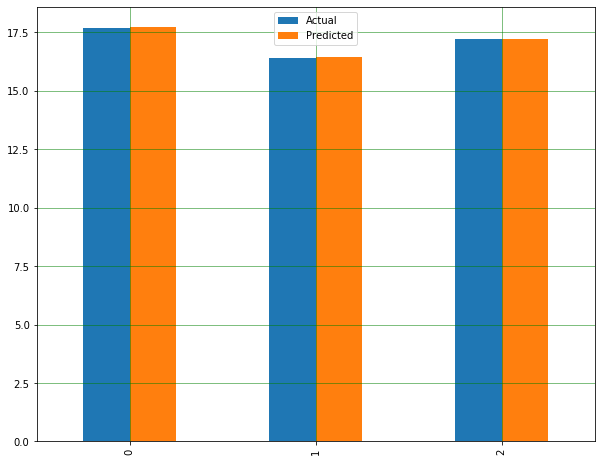

In [128]:
#Plot the comparison of Actual and Predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()